In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# ===============================================
#  Vehicle Theft Analysis
# ===============================================

# Install essential libraries
!pip install pandas numpy matplotlib seaborn --quiet

# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Load datasets
stolen_vehicles = pd.read_csv("/content/drive/MyDrive/cenfri/stolen_vehicles.csv")
make_details = pd.read_csv("/content/drive/MyDrive/cenfri/make_details.csv")
locations = pd.read_csv("/content/drive/MyDrive/cenfri/locations.csv")

#Preview each dataset
print("Stolen Vehicles:")
display(stolen_vehicles.head())

print("\n Make Details:")
display(make_details.head())

print("\n Locations:")
display(locations.head())

# Check their basic structure
print("\n Shape Summary:")
print(f"stolen_vehicles: {stolen_vehicles.shape}")
print(f"make_details: {make_details.shape}")
print(f"locations: {locations.shape}")


Stolen Vehicles:


,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
0,1,Trailer,623.0,2021.0,BST2021D,Silver,11/5/21,102
1,2,Boat Trailer,623.0,2021.0,OUTBACK BOATS FT470,Silver,12/13/21,105
2,3,Boat Trailer,623.0,2021.0,ASD JETSKI,Silver,2/13/22,102
3,4,Trailer,623.0,2021.0,MSC 7X4,Silver,11/13/21,106
4,5,Trailer,623.0,2018.0,D-MAX 8X5,Silver,1/10/22,102



 Make Details:


,make_id,make_name,make_type
0,501,Aakron Xpress,Standard
1,502,ADLY,Standard
2,503,Alpha,Standard
3,504,Anglo,Standard
4,505,Aprilia,Standard



 Locations:


,location_id,region,country,population,density
0,101,Northland,New Zealand,"201,500",16.11
1,102,Auckland,New Zealand,"1,695,200",343.09
2,103,Waikato,New Zealand,"513,800",21.50
3,104,Bay of Plenty,New Zealand,"347,700",28.80
4,105,Gisborne,New Zealand,"52,100",6.21



 Shape Summary:
stolen_vehicles: (4553, 8)
make_details: (138, 3)
locations: (16, 5)


In [5]:
# ===============================================
#  Merge & Clean Data
# ===============================================

# Merge stolen_vehicles with make_details (on make_id)
merged_df = stolen_vehicles.merge(make_details, on="make_id", how="left")

# Merge with locations (on location_id)
merged_df = merged_df.merge(locations, on="location_id", how="left")

# Convert date_stolen to datetime format
merged_df["date_stolen"] = pd.to_datetime(merged_df["date_stolen"], errors="coerce")

# Handle missing values
missing_summary = merged_df.isna().sum()
print(" Missing Values Summary:")
print(missing_summary[missing_summary > 0])

# Basic descriptive stats
print("\n Data Summary:")
print(merged_df.describe(include="all"))

# Create new time-based columns for later analysis
merged_df["year_stolen"] = merged_df["date_stolen"].dt.year
merged_df["month_stolen"] = merged_df["date_stolen"].dt.month
merged_df["weekday_stolen"] = merged_df["date_stolen"].dt.day_name()

# Quick verification of the merge
print("\n Merged dataset preview:")
display(merged_df.head())

# Save cleaned version for next steps
merged_df.to_csv("stolen_vehicles_enhanced.csv", index=False)
print("\n Saved cleaned dataset as 'stolen_vehicles_enhanced.csv'")

# Confirm size
print(f"\nFinal shape: {merged_df.shape}")


 Missing Values Summary:
vehicle_type    26
make_id         15
model_year      15
vehicle_desc    33
color           15
make_name       15
make_type       15
dtype: int64

 Data Summary:
         vehicle_id  vehicle_type      make_id  model_year vehicle_desc  \
count   4553.000000          4527  4538.000000  4538.00000         4520   
unique          NaN            25          NaN         NaN         1177   
top             NaN  Stationwagon          NaN         NaN        HILUX   
freq            NaN           945          NaN         NaN          137   
mean    2277.000000           NaN   584.128471  2005.23182          NaN   
min        1.000000           NaN   501.000000  1940.00000          NaN   
25%     1139.000000           NaN   550.000000  2000.00000          NaN   
50%     2277.000000           NaN   587.000000  2005.00000          NaN   
75%     3415.000000           NaN   619.000000  2011.00000          NaN   
max     4553.000000           NaN   638.000000  2022.00000     

/tmp/ipython-input-1988570238.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df["date_stolen"] = pd.to_datetime(merged_df["date_stolen"], errors="coerce")


,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id,make_name,make_type,region,country,population,density,year_stolen,month_stolen,weekday_stolen
0,1,Trailer,623.0,2021.0,BST2021D,Silver,2021-11-05,102,Trailer,Standard,Auckland,New Zealand,"1,695,200",343.09,2021,11,Friday
1,2,Boat Trailer,623.0,2021.0,OUTBACK BOATS FT470,Silver,2021-12-13,105,Trailer,Standard,Gisborne,New Zealand,"52,100",6.21,2021,12,Monday
2,3,Boat Trailer,623.0,2021.0,ASD JETSKI,Silver,2022-02-13,102,Trailer,Standard,Auckland,New Zealand,"1,695,200",343.09,2022,2,Sunday
3,4,Trailer,623.0,2021.0,MSC 7X4,Silver,2021-11-13,106,Trailer,Standard,Hawke's Bay,New Zealand,"182,700",12.92,2021,11,Saturday
4,5,Trailer,623.0,2018.0,D-MAX 8X5,Silver,2022-01-10,102,Trailer,Standard,Auckland,New Zealand,"1,695,200",343.09,2022,1,Monday



 Saved cleaned dataset as 'stolen_vehicles_enhanced.csv'

Final shape: (4553, 17)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Using 'merged_df' from Colab memory.
Data loaded: rows, cols = (4553, 17)
Columns ready for analysis: ['vehicle_id', 'vehicle_type', 'make_id', 'model_year', 'vehicle_desc', 'color', 'date_stolen', 'location_id', 'make_name', 'make_type', 'region', 'country', 'population', 'density', 'year_stolen', 'month_stolen', 'weekday_stolen', 'population_num', 'vehicle_age', 'hour']


/tmp/ipython-input-51678651.py:83: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('date_stolen').resample('M').size().rename('count').reset_index()


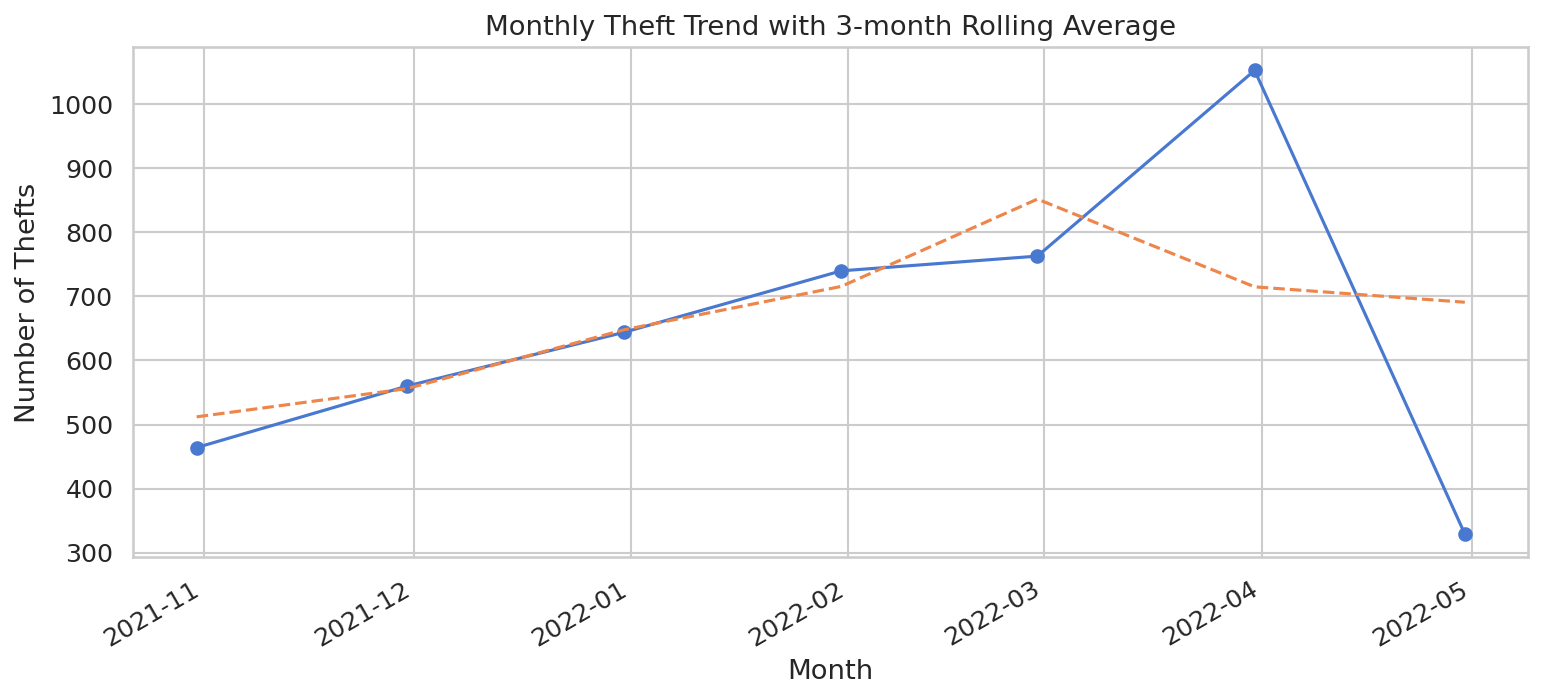

Saved: analysis_outputs_adv/monthly_trend_rolling.png


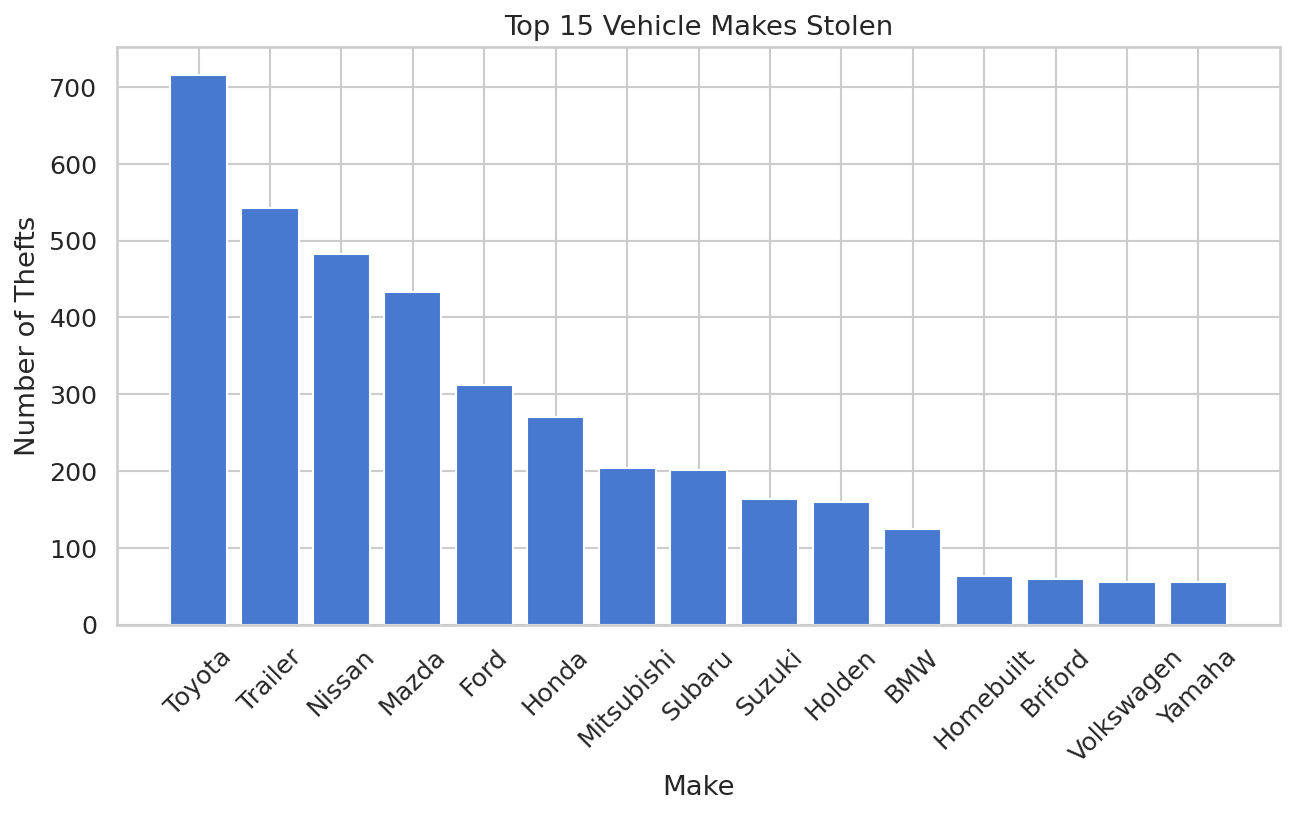

Saved: analysis_outputs_adv/top_15_makes.png

 EDA complete. Files saved to: analysis_outputs_adv
List of saved files:
- eda_summary.csv
- monthly_trend_rolling.png
- top_15_makes.png


In [7]:
# ============================
#  EDA
# ============================
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import Image, display

plt.rcParams.update({'figure.max_open_warning': 0})

OUTDIR = "analysis_outputs_adv"
os.makedirs(OUTDIR, exist_ok=True)

# 1) Load dataframe: use merged_df
if 'merged_df' in globals():
    df = merged_df.copy()
    print("Using 'merged_df' from Colab memory.")
else:
    # try common filenames saved earlier
    candidates = [
        "stolen_vehicles_enhanced.csv",
        "stolen_vehicles_merged.csv",
        "stolen_vehicles_enhanced_with_clusters.csv",
        "analysis_outputs/stolen_vehicles_merged.csv",
        "analysis_outputs/stolen_vehicles_enhanced_with_clusters.csv",
        "analysis_outputs_regenerated/stolen_vehicles_enhanced_regenerated.csv"
    ]
    df = None
    for p in candidates:
        if os.path.exists(p):
            print("Loading:", p)
            df = pd.read_csv(p, low_memory=False)
            break
    if df is None:
        raise FileNotFoundError("Merged dataset not found in workspace. Please ensure 'stolen_vehicles_enhanced.csv' or 'merged_df' is available.")
    # parse date if present
    if 'date_stolen' in df.columns:
        df['date_stolen'] = pd.to_datetime(df['date_stolen'], errors='coerce', infer_datetime_format=True)

print("Data loaded: rows, cols =", df.shape)

# 2)cleaning & feature engineering
# Normalize population to numeric (remove commas)
if 'population' in df.columns:
    df['population_num'] = pd.to_numeric(df['population'].astype(str).str.replace(',', ''), errors='coerce')
else:
    df['population_num'] = np.nan

# vehicle age
current_year = int(df['date_stolen'].dt.year.max()) if ('date_stolen' in df.columns and df['date_stolen'].notnull().any()) else 2022
if 'model_year' in df.columns:
    df['vehicle_age'] = current_year - pd.to_numeric(df['model_year'], errors='coerce')
else:
    df['vehicle_age'] = np.nan

# ensure weekday and hour exist
if 'date_stolen' in df.columns:
    df['weekday_stolen'] = df['date_stolen'].dt.day_name()
    df['hour'] = df['date_stolen'].dt.hour

# fill a visible marker for unknown make/vehicle_type for plotting
if 'make_name' in df.columns:
    df['make_name'] = df['make_name'].fillna('Unknown')
if 'vehicle_type' in df.columns:
    df['vehicle_type'] = df['vehicle_type'].fillna('Unknown')
if 'region' in df.columns:
    df['region'] = df['region'].fillna('Unknown')

print("Columns ready for analysis:", df.columns.tolist())

# save and display
def save_and_show(fig, fname):
    path = os.path.join(OUTDIR, fname)
    fig.savefig(path, bbox_inches='tight', dpi=150)
    plt.close(fig)
    display(Image(filename=path))
    print("Saved:", path)

# ---------- PLOT: Monthly trend with rolling average ----------
if 'date_stolen' in df.columns and df['date_stolen'].notna().any():
    monthly = df.set_index('date_stolen').resample('M').size().rename('count').reset_index()
    monthly['rolling_3m'] = monthly['count'].rolling(3, center=True, min_periods=1).mean()
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(monthly['date_stolen'], monthly['count'], marker='o')
    ax.plot(monthly['date_stolen'], monthly['rolling_3m'], linestyle='--')
    ax.set_title('Monthly Theft Trend with 3-month Rolling Average')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Thefts')
    ax.grid(True)
    fig.autofmt_xdate()
    save_and_show(fig, "monthly_trend_rolling.png")
else:
    print("Skipping monthly trend (no date_stolen)")



# ---------- PLOT: Top 15 makes ----------
make_col = next((c for c in ['make_name','make','vehicle_make'] if c in df.columns), None)
if make_col:
    top_makes = df[make_col].value_counts().head(15)
    fig, ax = plt.subplots(figsize=(10,5))
    ax.bar(top_makes.index, top_makes.values)
    ax.set_title('Top 15 Vehicle Makes Stolen')
    ax.set_xlabel('Make')
    ax.set_ylabel('Number of Thefts')
    ax.tick_params(axis='x', rotation=45)
    save_and_show(fig, "top_15_makes.png")
else:
    print("No make column available for top makes plot")


# Save a summary CSV
summary = {
    "total_incidents": len(df),
    "date_min": str(df['date_stolen'].min()) if 'date_stolen' in df.columns else "",
    "date_max": str(df['date_stolen'].max()) if 'date_stolen' in df.columns else ""
}
pd.Series(summary).to_csv(os.path.join(OUTDIR, "eda_summary.csv"))

print("\n EDA complete. Files saved to:", OUTDIR)
print("List of saved files:")
for f in sorted(os.listdir(OUTDIR)):
    print("-", f)


/tmp/ipython-input-2843926664.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=color_counts, x='color', y='theft_count', palette='viridis')


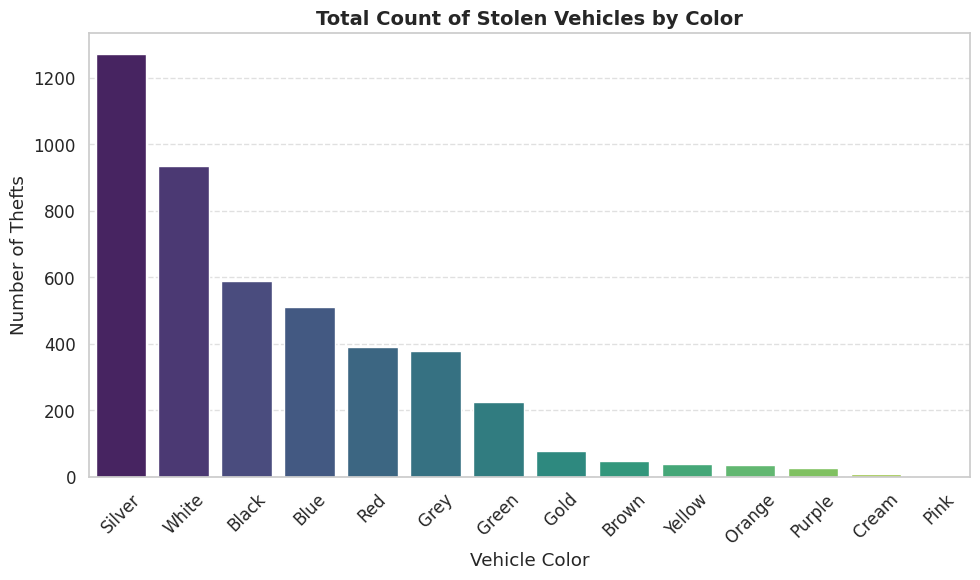

,color,theft_count
0,Silver,1272
1,White,934
2,Black,589
3,Blue,512
4,Red,390
5,Grey,378
6,Green,224
7,Gold,77
8,Brown,49
9,Yellow,39


In [8]:
# Total Count of Stolen Vehicles by Color

import matplotlib.pyplot as plt
import seaborn as sns

#  Count by color (drop missing)
color_counts = (
    merged_df['color']
    .dropna()
    .value_counts()
    .reset_index()
)

# Rename columns
color_counts.columns = ['color', 'theft_count']

# Sort descending
color_counts = color_counts.sort_values('theft_count', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=color_counts, x='color', y='theft_count', palette='viridis')
plt.title('Total Count of Stolen Vehicles by Color', fontsize=14, weight='bold')
plt.xlabel('Vehicle Color')
plt.ylabel('Number of Thefts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print table for reference
color_counts


/tmp/ipython-input-276724557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=color_counts, x='color', y='theft_count', palette='mako')


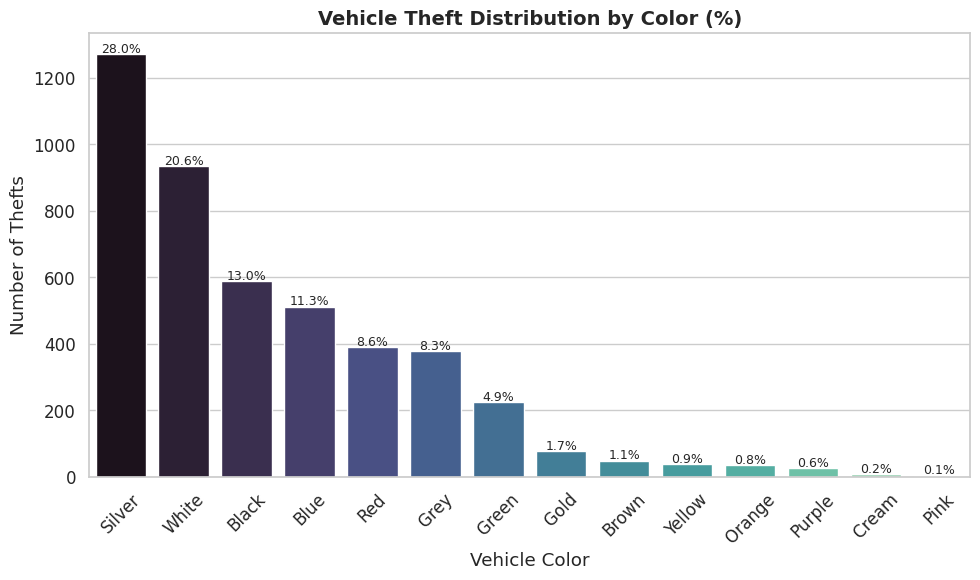

In [9]:
# Add percentage labels
total = color_counts['theft_count'].sum()
plt.figure(figsize=(10,6))
sns.barplot(data=color_counts, x='color', y='theft_count', palette='mako')

for i, v in enumerate(color_counts['theft_count']):
    plt.text(i, v + 5, f"{(v/total)*100:.1f}%", ha='center', fontsize=9)

plt.title('Vehicle Theft Distribution by Color (%)', fontsize=14, weight='bold')
plt.xlabel('Vehicle Color')
plt.ylabel('Number of Thefts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2023045852.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=type_counts, x='vehicle_type', y='theft_count', palette='crest')


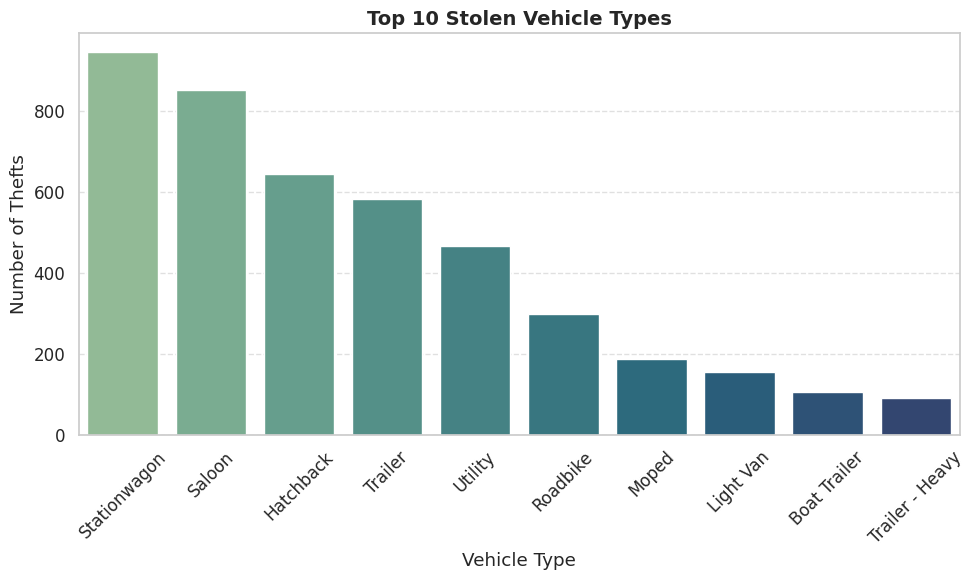

,vehicle_type,theft_count
0,Stationwagon,945
1,Saloon,851
2,Hatchback,644
3,Trailer,582
4,Utility,466
5,Roadbike,297
6,Moped,187
7,Light Van,154
8,Boat Trailer,105
9,Trailer - Heavy,90


In [10]:
# Top 10 Stolen Vehicle Types

import seaborn as sns
import matplotlib.pyplot as plt

# Count and sort
type_counts = (
    merged_df['vehicle_type']
    .dropna()
    .value_counts()
    .head(10)
    .reset_index()
)
type_counts.columns = ['vehicle_type', 'theft_count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=type_counts, x='vehicle_type', y='theft_count', palette='crest')
plt.title('Top 10 Stolen Vehicle Types', fontsize=14, weight='bold')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Thefts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Display table
type_counts


/tmp/ipython-input-3585830987.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


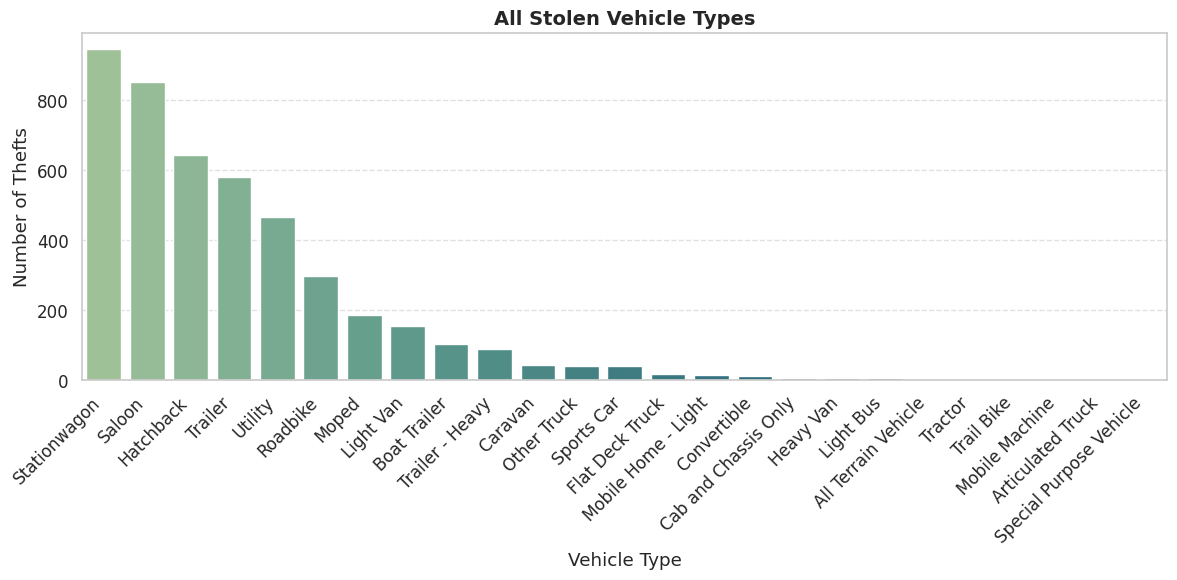

,vehicle_type,theft_count
0,Stationwagon,945
1,Saloon,851
2,Hatchback,644
3,Trailer,582
4,Utility,466
5,Roadbike,297
6,Moped,187
7,Light Van,154
8,Boat Trailer,105
9,Trailer - Heavy,90


In [11]:
#  All Stolen Vehicle Types

import seaborn as sns
import matplotlib.pyplot as plt

# Count and sort all vehicle types
type_counts = (
    merged_df['vehicle_type']
    .dropna()
    .value_counts()
    .reset_index()
)
type_counts.columns = ['vehicle_type', 'theft_count']

# Plot all categories
plt.figure(figsize=(12,6))
sns.barplot(
    data=type_counts,
    x='vehicle_type',
    y='theft_count',
    palette='crest'
)
plt.title('All Stolen Vehicle Types', fontsize=14, weight='bold')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Thefts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Display table for reference
type_counts


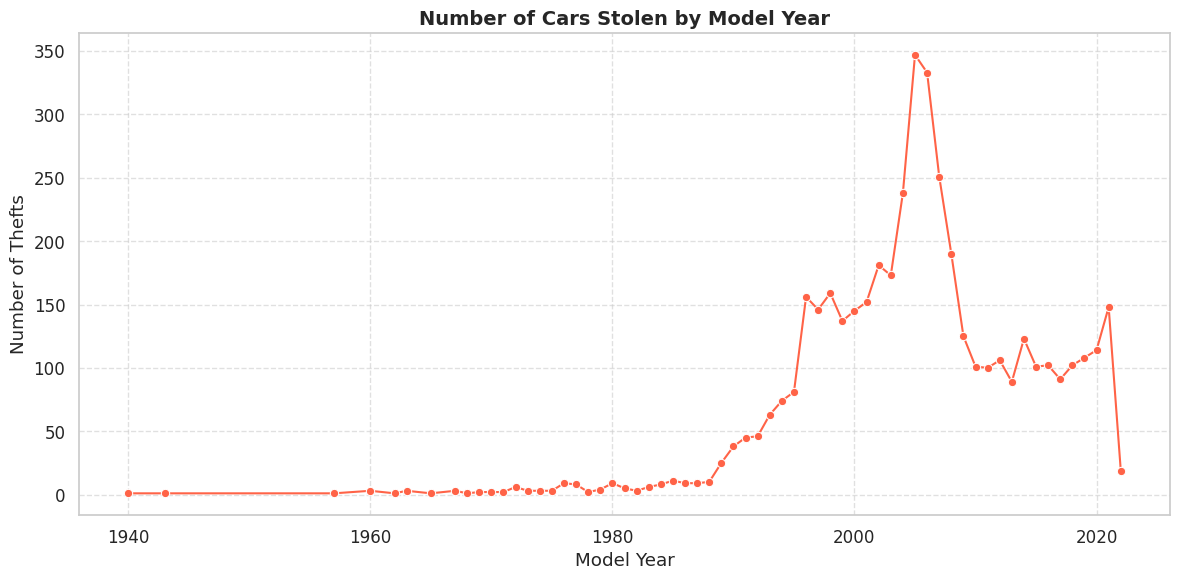

,model_year,theft_count
48,2008,190
49,2009,125
50,2010,101
51,2011,100
52,2012,106
53,2013,89
54,2014,123
55,2015,101
56,2016,102
57,2017,91


In [12]:
#Number of Cars Stolen by Model Year

# Clean numeric model year
model_years = (
    merged_df['model_year']
    .dropna()
    .astype(int)
    .value_counts()
    .sort_index()
    .reset_index()
)
model_years.columns = ['model_year', 'theft_count']

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=model_years, x='model_year', y='theft_count', marker='o', color='tomato')
plt.title('Number of Cars Stolen by Model Year', fontsize=14, weight='bold')
plt.xlabel('Model Year')
plt.ylabel('Number of Thefts')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Display table
model_years.tail(15)


/tmp/ipython-input-2346271729.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_counts, x='region', y='theft_count', palette='flare')


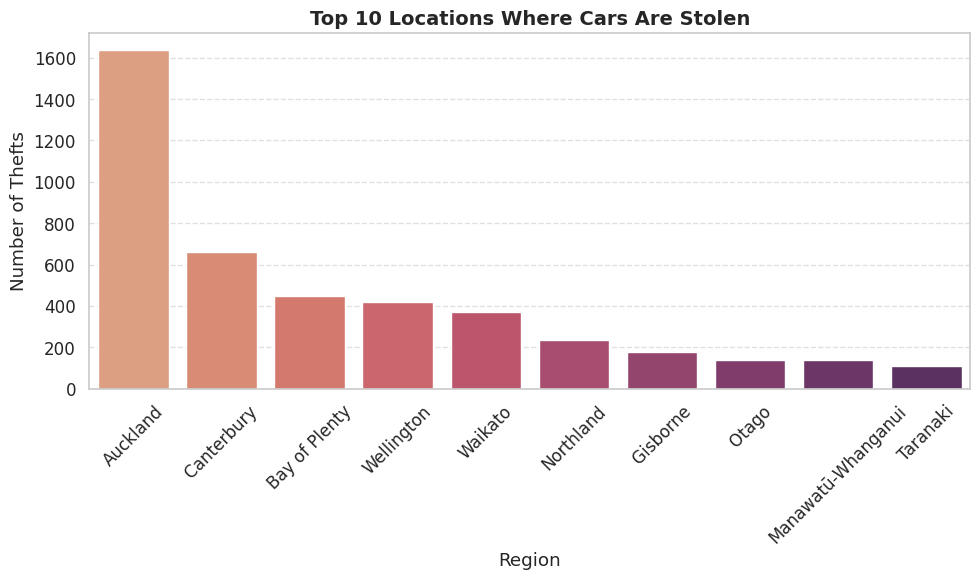

,region,theft_count
0,Auckland,1638
1,Canterbury,660
2,Bay of Plenty,446
3,Wellington,420
4,Waikato,371
5,Northland,234
6,Gisborne,176
7,Otago,139
8,Manawatū-Whanganui,139
9,Taranaki,112


In [13]:
# Top 10 Locations Where Cars Are Stolen

location_counts = (
    merged_df['region']
    .dropna()
    .value_counts()
    .head(10)
    .reset_index()
)
location_counts.columns = ['region', 'theft_count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=location_counts, x='region', y='theft_count', palette='flare')
plt.title('Top 10 Locations Where Cars Are Stolen', fontsize=14, weight='bold')
plt.xlabel('Region')
plt.ylabel('Number of Thefts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Display table
location_counts


/tmp/ipython-input-700017659.py:12: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  .resample('Q')


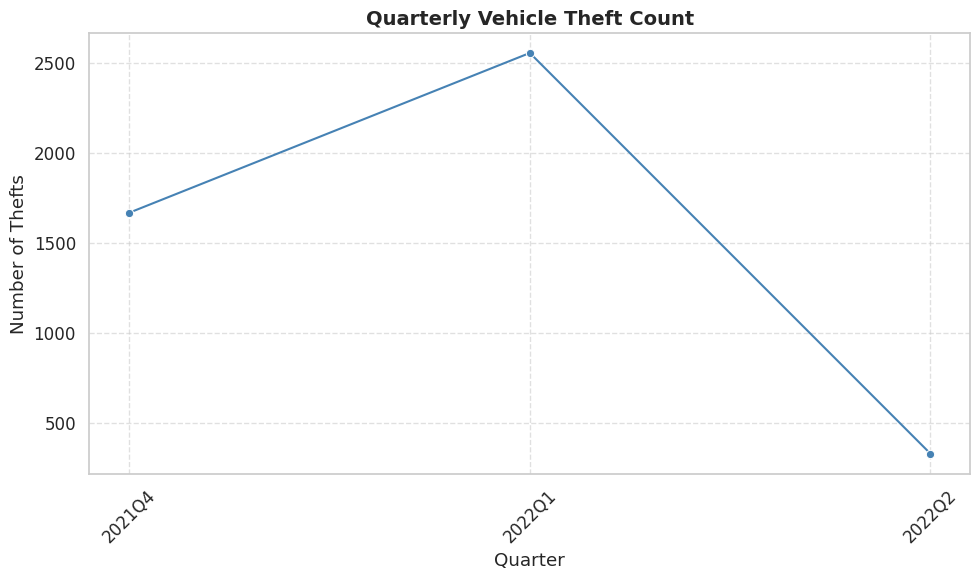

,date_stolen,theft_count,quarter_label
0,2021-12-31,1668,2021Q4
1,2022-03-31,2556,2022Q1
2,2022-06-30,329,2022Q2


In [15]:
# Quarterly Vehicle Theft Count

import pandas as pd

# Ensure date column is in datetime format
merged_df['date_stolen'] = pd.to_datetime(merged_df['date_stolen'], errors='coerce')

# Group by quarter
quarterly_counts = (
    merged_df
    .set_index('date_stolen')
    .resample('Q')
    .size()
    .reset_index(name='theft_count')
)

# Create formatted quarter label
quarterly_counts['quarter_label'] = quarterly_counts['date_stolen'].dt.to_period('Q').astype(str)

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=quarterly_counts, x='quarter_label', y='theft_count', marker='o', color='steelblue')
plt.title('Quarterly Vehicle Theft Count', fontsize=14, weight='bold')
plt.xlabel('Quarter')
plt.ylabel('Number of Thefts')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

quarterly_counts


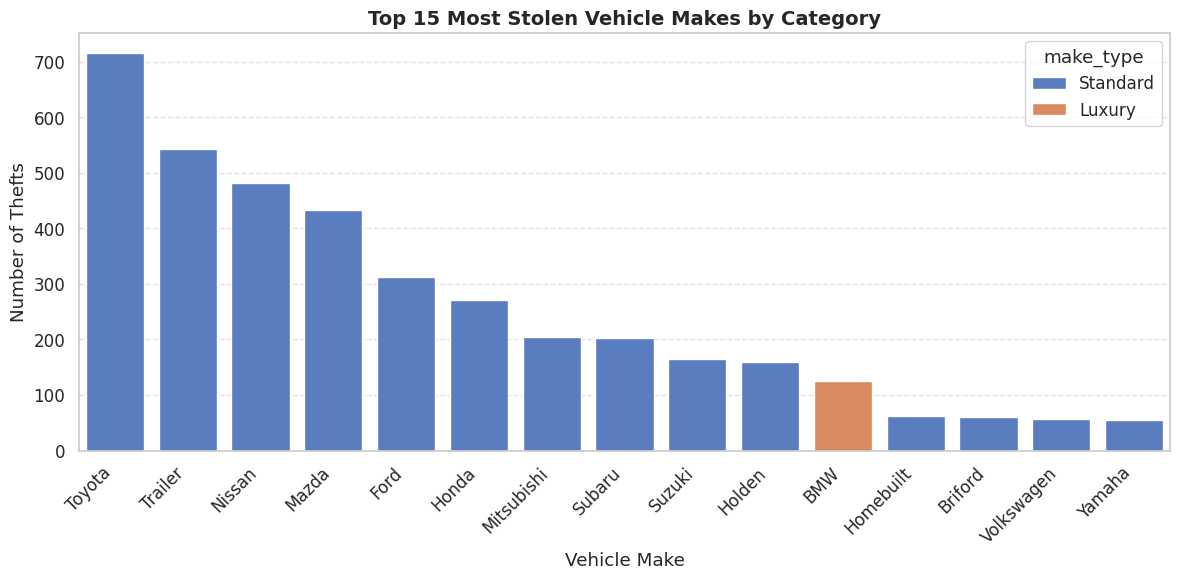

,make_name,make_type,count
118,Toyota,Standard,716
122,Trailer,Standard,543
86,Nissan,Standard,482
76,Mazda,Standard,433
40,Ford,Standard,312
49,Honda,Standard,271
79,Mitsubishi,Standard,204
110,Subaru,Standard,202
111,Suzuki,Standard,164
47,Holden,Standard,160


In [16]:
# Most Stolen Makes by Category

top_makes = (
    merged_df.groupby(['make_name', 'make_type'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head(15)
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_makes,
    x='make_name',
    y='count',
    hue='make_type',
    palette='muted'
)
plt.title('Top 15 Most Stolen Vehicle Makes by Category', fontsize=14, weight='bold')
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Thefts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

top_makes


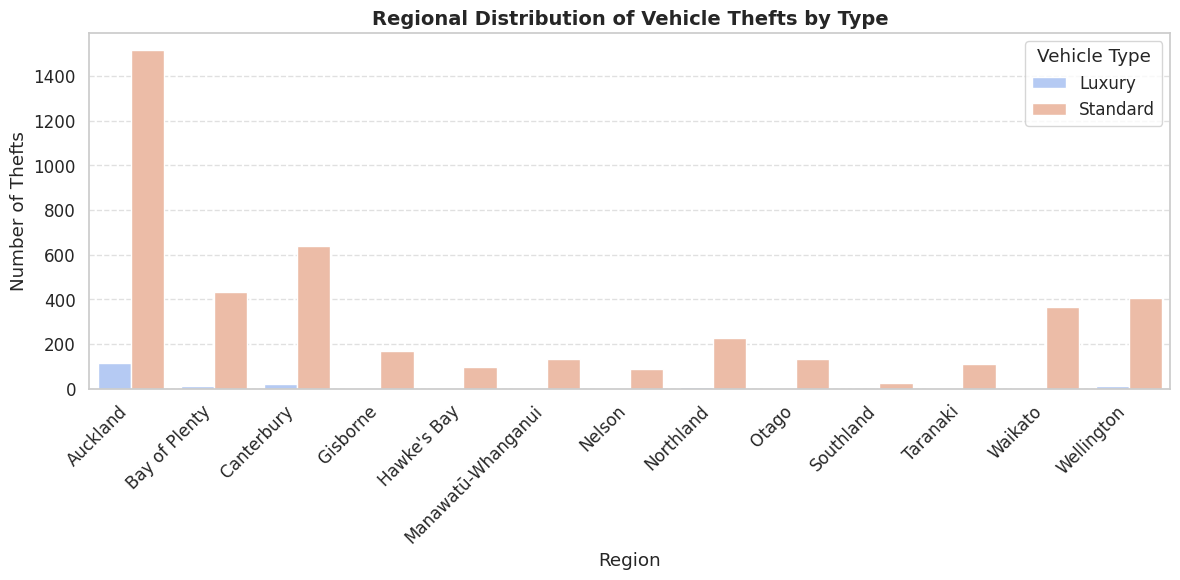

,region,make_type,count
0,Auckland,Luxury,114
1,Auckland,Standard,1516
2,Bay of Plenty,Luxury,14
3,Bay of Plenty,Standard,431
4,Canterbury,Luxury,20
5,Canterbury,Standard,640
6,Gisborne,Luxury,4
7,Gisborne,Standard,171
8,Hawke's Bay,Luxury,2
9,Hawke's Bay,Standard,98


In [17]:
# Regional Distribution: Luxury vs Standard

region_make_type = (
    merged_df.groupby(['region', 'make_type'])
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=region_make_type,
    x='region',
    y='count',
    hue='make_type',
    palette='coolwarm'
)
plt.title('Regional Distribution of Vehicle Thefts by Type', fontsize=14, weight='bold')
plt.xlabel('Region')
plt.ylabel('Number of Thefts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vehicle Type')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

region_make_type


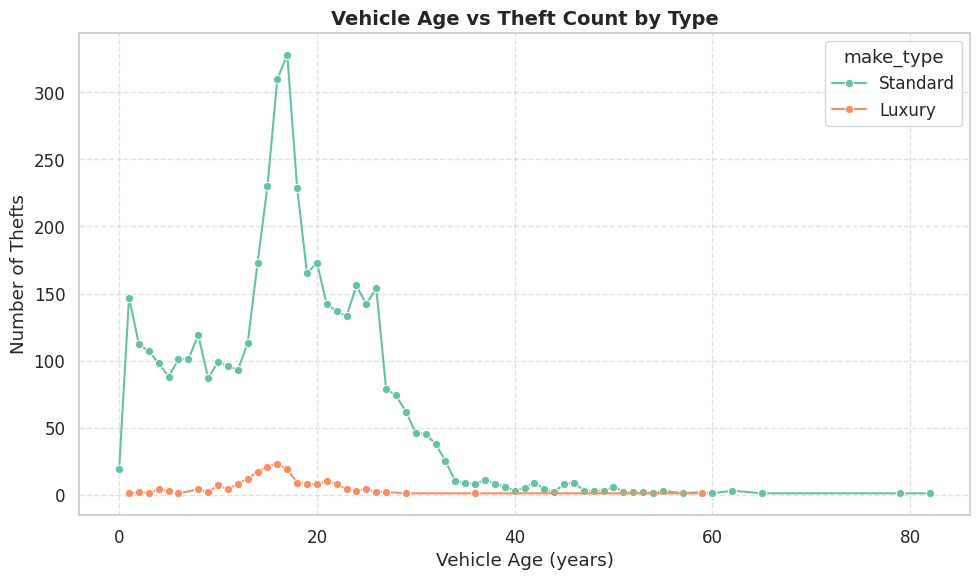

,vehicle_age,make_type,count
33,17.0,Standard,328
31,16.0,Standard,310
29,15.0,Standard,230
35,18.0,Standard,229
27,14.0,Standard,173
39,20.0,Standard,173
37,19.0,Standard,165
47,24.0,Standard,156
51,26.0,Standard,154
2,1.0,Standard,147


In [18]:
#  Vehicle Age vs. Theft Type

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute vehicle age (assuming thefts in 2022)
merged_df['vehicle_age'] = 2022 - merged_df['model_year']

# Drop invalid ages
merged_df = merged_df[(merged_df['vehicle_age'] >= 0) & (merged_df['vehicle_age'] < 100)]

# Group by vehicle age and type
age_type_trend = (
    merged_df.groupby(['vehicle_age', 'make_type'])
    .size()
    .reset_index(name='count')
)

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(
    data=age_type_trend,
    x='vehicle_age',
    y='count',
    hue='make_type',
    marker='o',
    palette='Set2'
)
plt.title('Vehicle Age vs Theft Count by Type', fontsize=14, weight='bold')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Number of Thefts')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

age_type_trend.sort_values('count', ascending=False).head(10)


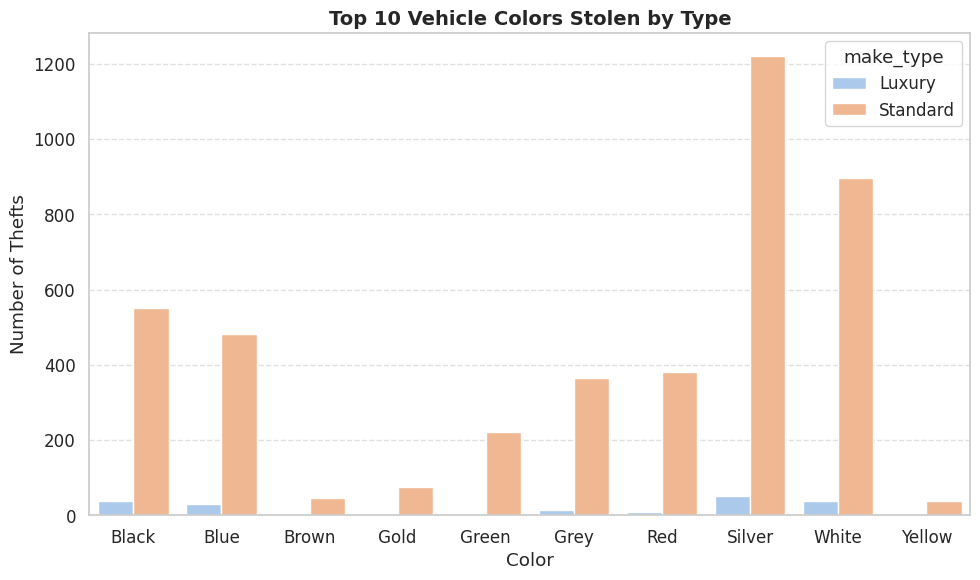

,color,make_type,count
0,Black,Luxury,37
1,Black,Standard,552
2,Blue,Luxury,30
3,Blue,Standard,482
4,Brown,Luxury,2
5,Brown,Standard,47
8,Gold,Luxury,2
9,Gold,Standard,75
10,Green,Luxury,4
11,Green,Standard,220


In [19]:
# Color vs Make Type

color_make_type = (
    merged_df.groupby(['color', 'make_type'])
    .size()
    .reset_index(name='count')
)

# Filter top colors only
top_colors = color_make_type.groupby('color')['count'].sum().nlargest(10).index
color_make_type = color_make_type[color_make_type['color'].isin(top_colors)]

plt.figure(figsize=(10,6))
sns.barplot(
    data=color_make_type,
    x='color',
    y='count',
    hue='make_type',
    palette='pastel'
)
plt.title('Top 10 Vehicle Colors Stolen by Type', fontsize=14, weight='bold')
plt.xlabel('Color')
plt.ylabel('Number of Thefts')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

color_make_type


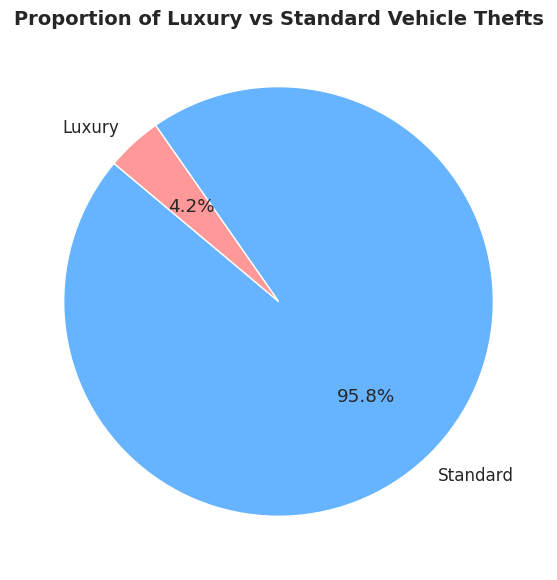

,count
make_type,
Standard,4348
Luxury,190


In [20]:
#  Proportion of Luxury vs Standard Vehicle Thefts

import matplotlib.pyplot as plt

# Count of each category
make_type_counts = merged_df['make_type'].value_counts()

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    make_type_counts,
    labels=make_type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66b3ff','#ff9999'],
    wedgeprops={'edgecolor':'white'}
)
plt.title('Proportion of Luxury vs Standard Vehicle Thefts', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

make_type_counts


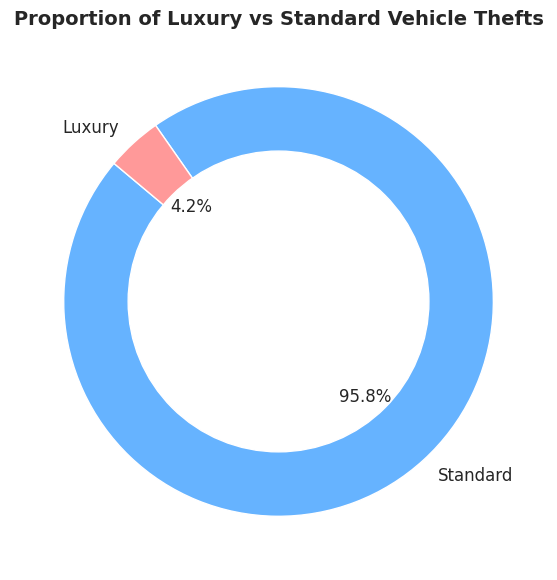

In [21]:
#  Donut Chart Version
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    make_type_counts,
    labels=make_type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66b3ff','#ff9999'],
    wedgeprops={'edgecolor':'white'},
    textprops={'fontsize':12}
)
# Create the "donut hole"
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Proportion of Luxury vs Standard Vehicle Thefts', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1869094068.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


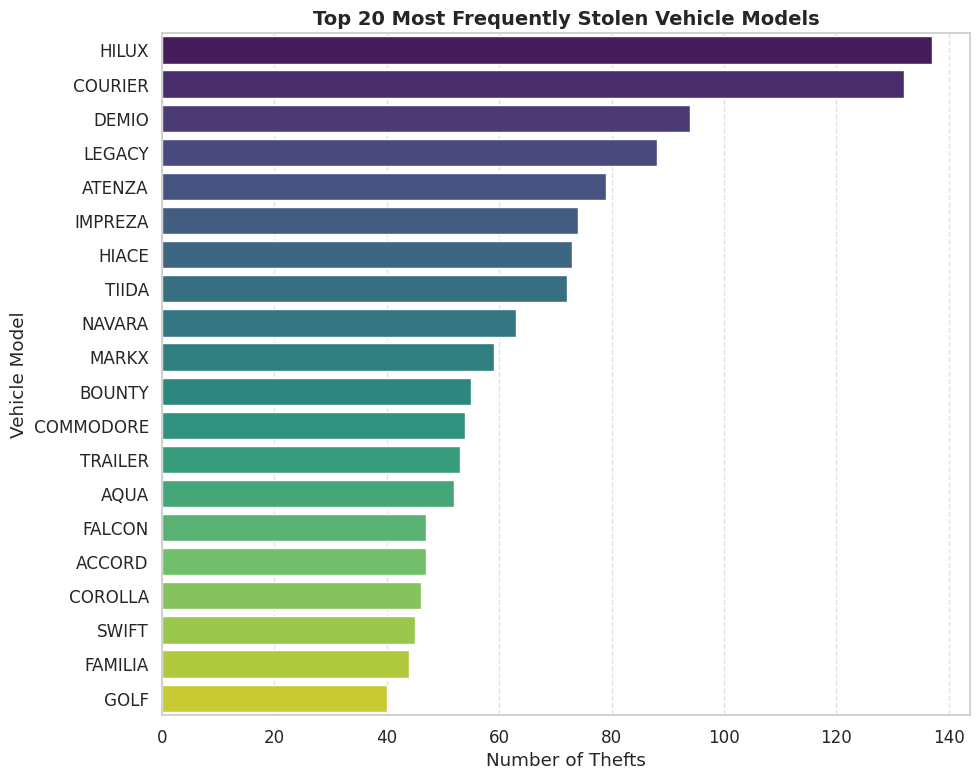

,vehicle_model,theft_count
0,HILUX,137
1,COURIER,132
2,DEMIO,94
3,LEGACY,88
4,ATENZA,79
5,IMPREZA,74
6,HIACE,73
7,TIIDA,72
8,NAVARA,63
9,MARKX,59


In [22]:
# Most Frequently Stolen Vehicle Models (Horizontal Bar Chart)

import seaborn as sns
import matplotlib.pyplot as plt

# Count and sort by theft frequency
model_counts = (
    merged_df['vehicle_desc']
    .dropna()
    .value_counts()
    .reset_index()
)
model_counts.columns = ['vehicle_model', 'theft_count']

# (Optional) show only top 20 models for clarity
top_n = 20
model_counts_top = model_counts.head(top_n)

# Plot
plt.figure(figsize=(10,8))
sns.barplot(
    data=model_counts_top,
    y='vehicle_model',
    x='theft_count',
    palette='viridis'
)
plt.title(f'Top {top_n} Most Frequently Stolen Vehicle Models', fontsize=14, weight='bold')
plt.xlabel('Number of Thefts')
plt.ylabel('Vehicle Model')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Display data table
model_counts_top


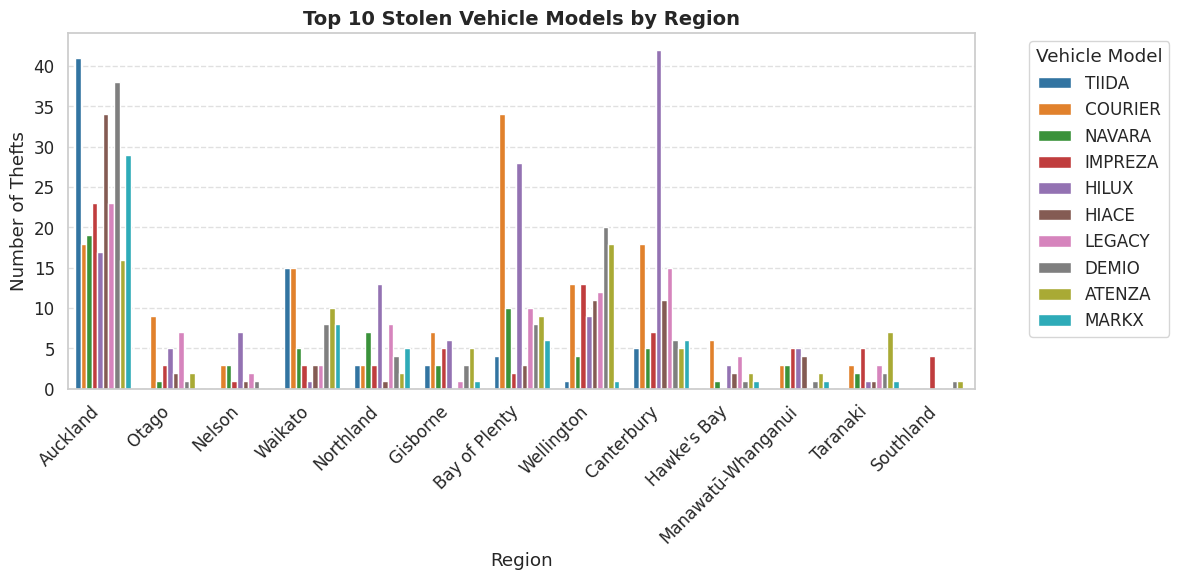

In [23]:
#  Vehicle Model vs Region

# Limit to top 10 models for clarity
top_models = merged_df['vehicle_desc'].value_counts().head(10).index
subset_df = merged_df[merged_df['vehicle_desc'].isin(top_models)]

plt.figure(figsize=(12,6))
sns.countplot(
    data=subset_df,
    x='region',
    hue='vehicle_desc',
    palette='tab10'
)
plt.title('Top 10 Stolen Vehicle Models by Region', fontsize=14, weight='bold')
plt.xlabel('Region')
plt.ylabel('Number of Thefts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vehicle Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [24]:
# Count thefts per region
region_thefts = merged_df.groupby('region')['vehicle_id'].count().reset_index(name='theft_count')

# Top 5 and bottom 5
top_regions = region_thefts.nlargest(5, 'theft_count')
bottom_regions = region_thefts.nsmallest(5, 'theft_count')

print(" Top 5 Regions by Thefts:")
display(top_regions)

print("\n Bottom 5 Regions by Thefts:")
display(bottom_regions)


 Top 5 Regions by Thefts:


,region,theft_count
0,Auckland,1630
2,Canterbury,660
1,Bay of Plenty,445
12,Wellington,417
11,Waikato,369



 Bottom 5 Regions by Thefts:


,region,theft_count
9,Southland,26
6,Nelson,92
4,Hawke's Bay,100
10,Taranaki,112
5,Manawatū-Whanganui,139


In [25]:
# Top stolen make per region
top_make_region = (
    merged_df.groupby(['region', 'make_name'])['vehicle_id']
    .count()
    .reset_index(name='theft_count')
    .sort_values(['region', 'theft_count'], ascending=[True, False])
    .groupby('region')
    .head(1)
)

print(" Most Stolen Make per Region:")
display(top_make_region)


 Most Stolen Make per Region:


,region,make_name,theft_count
85,Auckland,Toyota,273
140,Bay of Plenty,Toyota,72
192,Canterbury,Toyota,136
209,Gisborne,Nissan,29
239,Hawke's Bay,Trailer,21
262,Manawatū-Whanganui,Trailer,27
286,Nelson,Trailer,18
315,Northland,Toyota,32
347,Otago,Toyota,21
360,Southland,Subaru,4


In [26]:
merged_df['vehicle_age'] = 2022 - merged_df['model_year']
print(" Vehicle Age Distribution:")
display(merged_df['vehicle_age'].describe())

 Vehicle Age Distribution:


,vehicle_age
count,4538.00000
mean,16.76818
std,9.11763
min,0.00000
25%,11.00000
50%,17.00000
75%,22.00000
max,82.00000


In [27]:
bins = [0, 5, 10, 15, 20, 30]
labels = ['0–5 yrs', '6–10 yrs', '11–15 yrs', '16–20 yrs', '20+ yrs']
merged_df['age_group'] = pd.cut(merged_df['vehicle_age'], bins=bins, labels=labels, right=False)
display(merged_df['age_group'].value_counts())

,count
age_group,
16–20 yrs,1342
20+ yrs,1294
11–15 yrs,622
6–10 yrs,506
0–5 yrs,491


/tmp/ipython-input-1149264751.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_type = merged_df.groupby(['age_group', 'make_type'])['vehicle_id'].count().reset_index(name='theft_count')


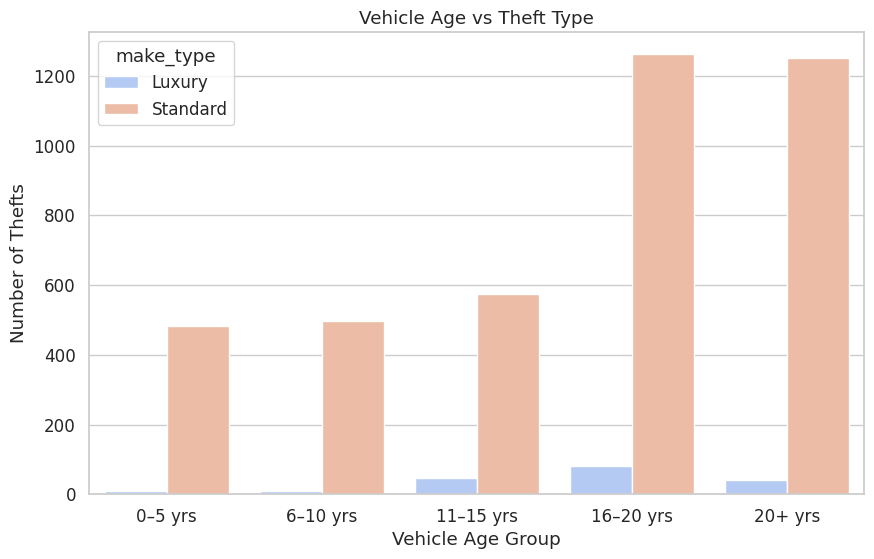

In [28]:
age_type = merged_df.groupby(['age_group', 'make_type'])['vehicle_id'].count().reset_index(name='theft_count')

plt.figure(figsize=(10,6))
sns.barplot(data=age_type, x='age_group', y='theft_count', hue='make_type', palette='coolwarm')
plt.title('Vehicle Age vs Theft Type')
plt.xlabel('Vehicle Age Group')
plt.ylabel('Number of Thefts')
plt.show()


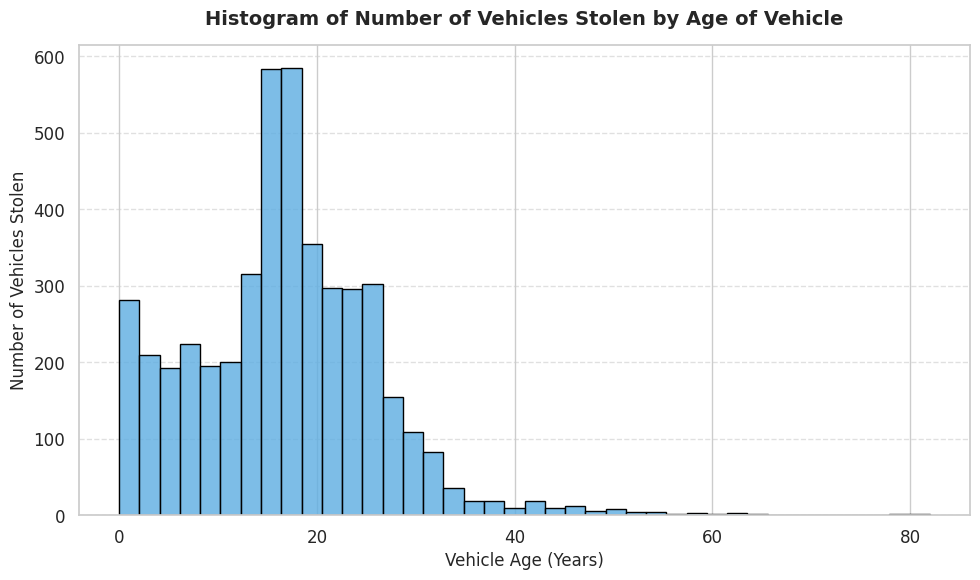

In [29]:
#  Histogram of Number of Vehicles Stolen by Vehicle Age (Improved Style)

plt.figure(figsize=(10,6))
sns.histplot(
    data=merged_df,
    x='vehicle_age',
    bins=40,                   # More bins = smoother shape
    color='#5DADE2',
    edgecolor='black',
    alpha=0.8
)

plt.title('Histogram of Number of Vehicles Stolen by Age of Vehicle', fontsize=14, weight='bold', pad=15)
plt.xlabel('Vehicle Age (Years)', fontsize=12)
plt.ylabel('Number of Vehicles Stolen', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


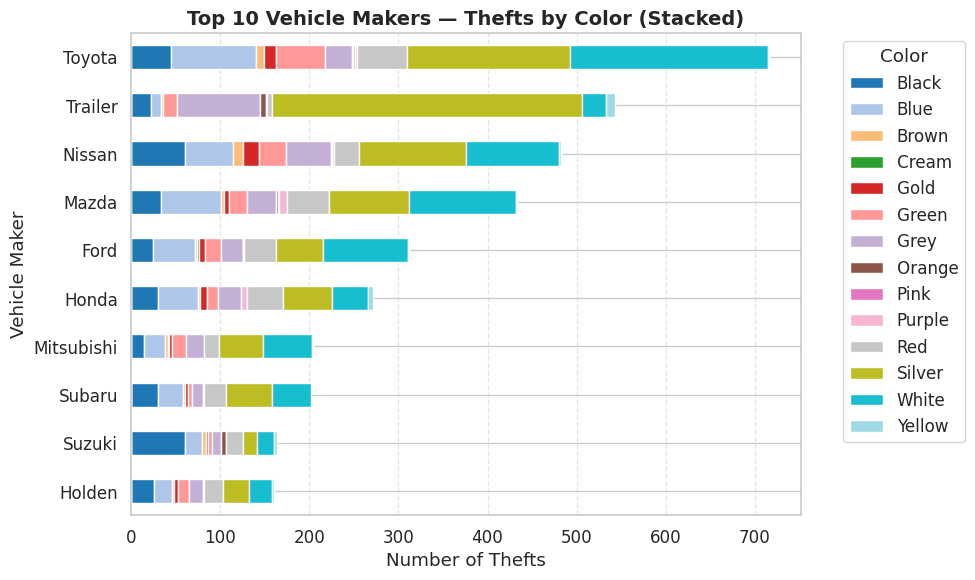

In [30]:
# Group and count thefts by maker and color
maker_color_counts = (
    merged_df.groupby(['make_name', 'color'])
    .size()
    .reset_index(name='theft_count')
)

# Focus on top 10 makers
top10_makers = merged_df['make_name'].value_counts().head(10).index
filtered_data = maker_color_counts[maker_color_counts['make_name'].isin(top10_makers)]

# Pivot for stacked bar chart
pivot_data = filtered_data.pivot_table(
    index='make_name',
    columns='color',
    values='theft_count',
    fill_value=0
)

# Sort as descending
pivot_data = pivot_data.loc[pivot_data.sum(axis=1).sort_values(ascending=True).index]

# Plot
pivot_data.plot(
    kind='barh',
    stacked=True,
    figsize=(10,6),
    colormap='tab20'
)

plt.title('Top 10 Vehicle Makers — Thefts by Color (Stacked)', fontsize=14, weight='bold')
plt.xlabel('Number of Thefts')
plt.ylabel('Vehicle Maker')
plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


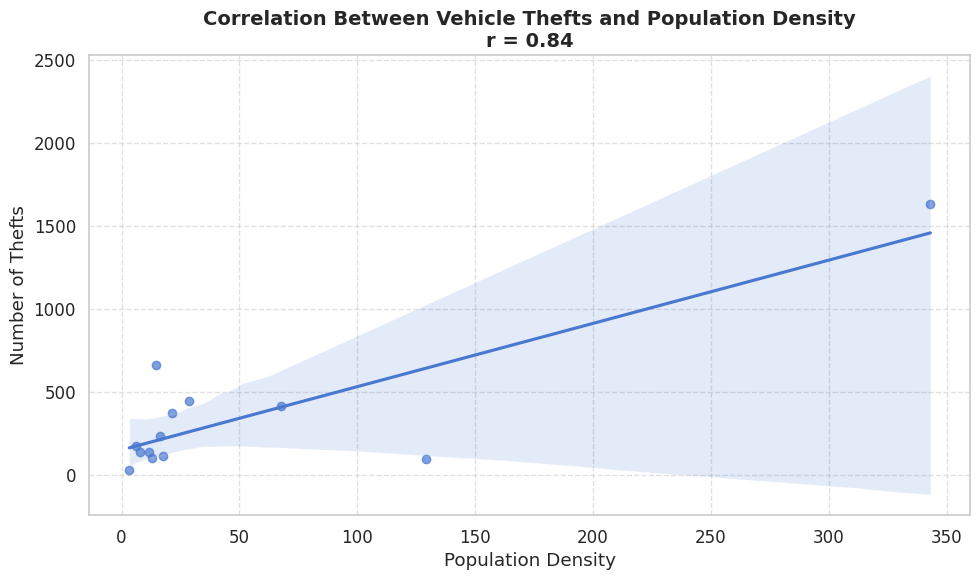

 Top 5 Regions — Highest Per-Capita Theft Rate


,region,theft_count,population,density,thefts_per_10k_pop
3,Gisborne,175.000000,52100.000000,6.210000,33.589251
6,Nelson,92.000000,54500.000000,129.150000,16.880734
1,Bay of Plenty,445.000000,347700.000000,28.800000,12.798389
7,Northland,234.000000,201500.000000,16.110000,11.612903
2,Canterbury,660.000000,655000.000000,14.720000,10.076336



 Bottom 5 Regions — Lowest Per-Capita Theft Rate


,region,theft_count,population,density,thefts_per_10k_pop
9,Southland,26.000000,102400.000000,3.280000,2.539062
5,Manawatū-Whanganui,139.000000,258200.000000,11.620000,5.383424
4,Hawke's Bay,100.000000,182700.000000,12.920000,5.473454
8,Otago,139.000000,246000.000000,7.890000,5.650407
11,Waikato,369.000000,513800.000000,21.500000,7.181783



Pearson Correlation (r): 0.841


In [46]:
# Correlation Between Vehicle Thefts and Population Density

# --- Step 1: Aggregate total thefts per region ---
region_thefts = merged_df.groupby('region')['vehicle_id'].count().reset_index()
region_thefts.rename(columns={'vehicle_id': 'theft_count'}, inplace=True)

# --- Step 2: Add population and density information ---
region_info = merged_df[['region', 'population', 'density']].drop_duplicates()
region_data = region_thefts.merge(region_info, on='region', how='left')

# --- Step 2.5: Clean and convert to numeric (remove commas) ---
region_data['population'] = region_data['population'].astype(str).str.replace(',', '').astype('float64')
region_data['density'] = pd.to_numeric(region_data['density'], errors='coerce')
region_data['theft_count'] = region_data['theft_count'].astype('float64')

# --- Step 3: Compute correlation between thefts and density ---
corr_value = region_data['theft_count'].corr(region_data['density'])

# --- Step 4: Visualization (scatter with regression line) ---
plt.figure(figsize=(10,6))
sns.regplot(data=region_data, x='density', y='theft_count', scatter_kws={'alpha':0.7})
plt.title(f'Correlation Between Vehicle Thefts and Population Density\nr = {corr_value:.2f}',
          fontsize=14, weight='bold')
plt.xlabel('Population Density')
plt.ylabel('Number of Thefts')
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Step 5: Compute per-capita theft rate (per 10,000 residents) ---
region_data['thefts_per_10k_pop'] = (region_data['theft_count'] / region_data['population']) * 10000

# --- Step 6: Rank regions by per-capita theft rate ---
top5 = region_data.nlargest(5, 'thefts_per_10k_pop')[['region', 'theft_count', 'population', 'density', 'thefts_per_10k_pop']]
bottom5 = region_data.nsmallest(5, 'thefts_per_10k_pop')[['region', 'theft_count', 'population', 'density', 'thefts_per_10k_pop']]

# --- Step 7: Display ranked summaries ---
print(" Top 5 Regions — Highest Per-Capita Theft Rate")
display(top5.style.background_gradient(cmap='Reds', subset=['thefts_per_10k_pop']))

print("\n Bottom 5 Regions — Lowest Per-Capita Theft Rate")
display(bottom5.style.background_gradient(cmap='Blues', subset=['thefts_per_10k_pop']))

# --- Step 8: Print correlation value clearly ---
print(f"\nPearson Correlation (r): {corr_value:.3f}")